In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
xy = np.loadtxt('data/data-02-stock_daily.csv', delimiter=',')

In [7]:
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [8]:
xy = xy[::-1]

In [9]:
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [10]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

In [11]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

> Xnorm = X−Xmin/Xmax−Xmin

In [12]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [17]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        print(_x, '->', _y)
        dataX.append(_x)
        dataY.append(_y)
        
    return np.array(dataX), np.array(dataY)

In [18]:
trainX, trainY = build_dataset(train_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]] -> [0.50304137]
[[0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]
 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]
 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]
 [0.48214202 0.47810717 0.49537795 0.15959487 0.50304137]] -> [0.45815455]
[[0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]
 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]
 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]
 [0.48214202 0.47810717 0.49537795 0.15959487 0.50304137]
 [0.4566113  0.4476878  0.45775323 0.22900421 0.45815455]] -> [0.45699271]
[[0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.483075

In [19]:
testX, testY = build_dataset(test_set, seq_length)

[[0.47419206 0.50445037 0.51770809 0.22296353 0.49142842]
 [0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.10180958 0.41538731]
 [0.3882862  0.43583844 0.43786128 0.08716152 0.4625172 ]
 [0.44583656 0.44031831 0.44222336 0.16161315 0.43020148]] -> [0.42345156]
[[0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.10180958 0.41538731]
 [0.3882862  0.43583844 0.43786128 0.08716152 0.4625172 ]
 [0.44583656 0.44031831 0.44222336 0.16161315 0.43020148]
 [0.43744363 0.43118193 0.43780064 0.13134796 0.42345156]] -> [0.40523252]
[[0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.1

In [20]:
with tf.variable_scope('stock_rnn', reuse=tf.AUTO_REUSE) as scope:
    X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
    Y = tf.placeholder(tf.float32, [None, 1])

    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    
    Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `layer.__call__` method instead.


In [21]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [22]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})

        print(f'[step: {i}] loss: {step_loss}')
        
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    
    print(f'RMSE: {rmse_val}')

[step: 0] loss: 294.3552551269531
[step: 1] loss: 222.8157196044922
[step: 2] loss: 170.74754333496094
[step: 3] loss: 132.3740997314453
[step: 4] loss: 103.61531829833984
[step: 5] loss: 81.73056030273438
[step: 6] loss: 64.89078521728516
[step: 7] loss: 51.899986267089844
[step: 8] loss: 42.0145263671875
[step: 9] loss: 34.796627044677734
[step: 10] loss: 29.969545364379883
[step: 11] loss: 27.257282257080078
[step: 12] loss: 26.222021102905273
[step: 13] loss: 26.201412200927734
[step: 14] loss: 26.417430877685547
[step: 15] loss: 26.180273056030273
[step: 16] loss: 25.073062896728516
[step: 17] loss: 23.02610206604004
[step: 18] loss: 20.265703201293945
[step: 19] loss: 17.190776824951172
[step: 20] loss: 14.239838600158691
[step: 21] loss: 11.783759117126465
[step: 22] loss: 10.047527313232422
[step: 23] loss: 9.044561386108398
[step: 24] loss: 8.53254508972168
[step: 25] loss: 8.071209907531738
[step: 26] loss: 7.246363639831543
[step: 27] loss: 5.920705795288086
[step: 28] loss:

[step: 263] loss: 0.9028178453445435
[step: 264] loss: 0.9014567136764526
[step: 265] loss: 0.9001017212867737
[step: 266] loss: 0.8987529277801514
[step: 267] loss: 0.8974099159240723
[step: 268] loss: 0.8960731029510498
[step: 269] loss: 0.8947418928146362
[step: 270] loss: 0.893416702747345
[step: 271] loss: 0.8920968174934387
[step: 272] loss: 0.8907826542854309
[step: 273] loss: 0.8894737362861633
[step: 274] loss: 0.8881702423095703
[step: 275] loss: 0.8868717551231384
[step: 276] loss: 0.8855783343315125
[step: 277] loss: 0.8842900395393372
[step: 278] loss: 0.8830063939094543
[step: 279] loss: 0.8817275166511536
[step: 280] loss: 0.8804535865783691
[step: 281] loss: 0.8791843056678772
[step: 282] loss: 0.8779193162918091
[step: 283] loss: 0.8766586780548096
[step: 284] loss: 0.8754025101661682
[step: 285] loss: 0.8741506338119507
[step: 286] loss: 0.8729026317596436
[step: 287] loss: 0.8716588020324707
[step: 288] loss: 0.8704190254211426
[step: 289] loss: 0.8691831231117249
[s

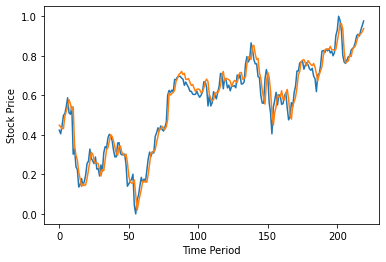

In [26]:
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()